In [232]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

In [233]:
df=pd.read_csv(r"C:\Users\boina\OneDrive\Desktop\sb\Nutrient Composition Dataset.csv")

In [234]:
df.head()

,S.No,Protein,Fat,vitaminC,Fibre,Product
0,1,0.452369,1.170926,1.079271,1.702960,"Amaranth leaves, cooked, boiled, drained, with..."
1,2,2.321087,0.706856,0.350088,0.658249,Bacon and beef sticks
2,3,0.884554,1.186571,2.428544,1.984562,"Apples, frozen, unsweetened, unheated (Include..."
3,4,0.715501,0.577599,0.270925,0.369266,"Alcoholic beverage, beer, light, BUD LIGHT"
4,5,0.132610,0.544521,0.116884,0.557309,"Alcoholic beverage, daiquiri, canned"


In [215]:
df.shape

(1746, 6)

In [216]:
df.isnull().sum()

S.No        0
Protein     0
Fat         0
vitaminC    0
Fibre       0
Product     0
dtype: int64

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746 entries, 0 to 1745
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   S.No      1746 non-null   int64  
 1   Protein   1746 non-null   float64
 2   Fat       1746 non-null   float64
 3   vitaminC  1746 non-null   float64
 4   Fibre     1746 non-null   float64
 5   Product   1746 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 82.0+ KB


In [218]:
df.describe()

,S.No,Protein,Fat,vitaminC,Fibre
count,1746.000000,1746.000000,1746.000000,1746.000000,1746.000000
mean,873.500000,0.922470,0.900091,0.900146,0.900830
std,504.171102,0.627128,0.634617,0.623847,0.626875
min,1.000000,0.000128,0.000267,0.000029,0.002579
25%,437.250000,0.435853,0.394784,0.419103,0.389124
50%,873.500000,0.813025,0.804687,0.796290,0.820783
75%,1309.750000,1.295106,1.298988,1.280870,1.295732
max,1746.000000,4.016890,3.979364,4.013322,3.570331


In [235]:
df=df.drop(['Product','S.No'],axis=1)

In [236]:
df.head()

,Protein,Fat,vitaminC,Fibre
0,0.452369,1.170926,1.079271,1.702960
1,2.321087,0.706856,0.350088,0.658249
2,0.884554,1.186571,2.428544,1.984562
3,0.715501,0.577599,0.270925,0.369266
4,0.132610,0.544521,0.116884,0.557309


In [201]:
df.corr()

,Protein,Fat,vitaminC,Fibre
Protein,1.000000,0.382312,0.025389,0.043823
Fat,0.382312,1.000000,0.048272,0.068079
vitaminC,0.025389,0.048272,1.000000,0.361466
Fibre,0.043823,0.068079,0.361466,1.000000


In [202]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler=StandardScaler()
DF=scaler.fit_transform(df)

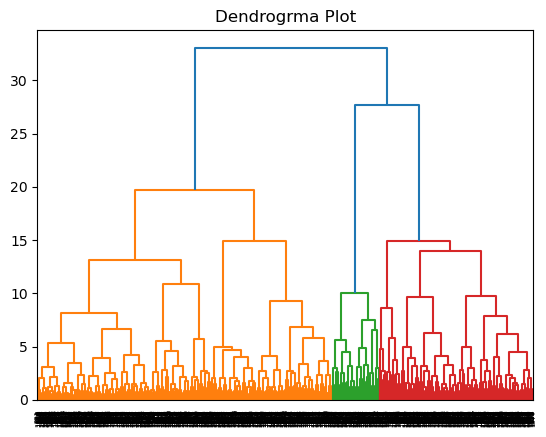

In [111]:
import scipy.cluster.hierarchy as shc  
dendro = shc.dendrogram(shc.linkage(df, method="ward"))  
plt.title("Dendrogrma Plot")    
plt.show() 

In [112]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score

#different linkage methods
methods = ['ward', 'complete', 'average', 'single']

for method in methods:
    Z = linkage(DF, method=method)
    clusters = fcluster(Z, t=3, criterion='maxclust')
    silhouette_avg = silhouette_score(DF, clusters)
    print(f'Silhouette Score for {method} linkage: {silhouette_avg}')


Silhouette Score for ward linkage: 0.20751664009284115
Silhouette Score for complete linkage: 0.18358482947312946
Silhouette Score for average linkage: 0.4800733568418761
Silhouette Score for single linkage: 0.4981063242203874


In [113]:
# different numbers of clusters
for num_clusters in range(2, 10):
    Z = linkage(DF, method='single')
    clusters = fcluster(Z, t=num_clusters, criterion='maxclust')
    silhouette_avg = silhouette_score(DF, clusters)
    print(f'Silhouette Score for {num_clusters} clusters: {silhouette_avg}')


Silhouette Score for 2 clusters: 0.5019044175673079
Silhouette Score for 3 clusters: 0.4981063242203874
Silhouette Score for 4 clusters: 0.4902742690626224
Silhouette Score for 5 clusters: 0.40656966844998305
Silhouette Score for 6 clusters: 0.4019932087993399
Silhouette Score for 7 clusters: 0.388739407058724
Silhouette Score for 8 clusters: 0.3842361406066378
Silhouette Score for 9 clusters: 0.3746383272580705


In [114]:
#  different distance metrics
metrics = ['euclidean', 'cityblock', 'cosine']

for metric in metrics:
    Z = linkage(DF, method='single', metric=metric)
    clusters = fcluster(Z, t=2, criterion='maxclust')
    silhouette_avg = silhouette_score(DF, clusters)
    print(f'Silhouette Score for {metric} distance metric: {silhouette_avg}')


Silhouette Score for euclidean distance metric: 0.5019044175673079
Silhouette Score for cityblock distance metric: 0.5019044175673079
Silhouette Score for cosine distance metric: -0.10343614406807757


In [115]:
Z1 = linkage(DF, method='single', metric='cityblock')
clusters = fcluster(Z1, t=2, criterion='maxclust')
silhouette_avg = silhouette_score(DF, clusters)
print(f'Silhouette Score for single linkage and cityblock distance metric: {silhouette_avg}')

Silhouette Score for single linkage and cityblock distance metric: 0.5019044175673079


In [116]:
headers = ['Protein', 'Fat', 'vitaminC','Fibre']

In [117]:
DF = pd.DataFrame(DF,columns=headers)

In [118]:
DF['Cluster'] = clusters

In [119]:
DF.head()

,Protein,Fat,vitaminC,Fibre,Cluster
0,-0.749825,0.426892,0.287212,1.279936,1
1,2.230835,-0.304578,-0.881972,-0.387079,1
2,-0.060478,0.451551,2.450659,1.729280,1
3,-0.330121,-0.508314,-1.008903,-0.848201,1
4,-1.259850,-0.560451,-1.255896,-0.548145,1


In [120]:
DF.columns

Index(['Protein', 'Fat', 'vitaminC', 'Fibre', 'Cluster'], dtype='object')

In [121]:
DF['Cluster'].value_counts()

Cluster
1    1745
2       1
Name: count, dtype: int64

In [58]:
cluster_means = DF.groupby('Cluster').mean()
print(cluster_means)

          Protein       Fat  vitaminC     Fibre
Cluster                                        
1        0.000112 -0.002509  0.000385 -0.001487
2       -0.194791  4.377637 -0.671407  2.595249


After PCA

In [59]:
DF.columns

Index(['Protein', 'Fat', 'vitaminC', 'Fibre', 'Cluster'], dtype='object')

In [65]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(DF[['Protein', 'Fat', 'vitaminC', 'Fibre']])
reduced_df = pd.DataFrame(reduced_features, columns=['PC1', 'PC2'])

In [66]:
reduced_df.head()

,PC1,PC2
0,0.596200,-0.985509
1,0.389166,1.630697
2,2.174395,-2.036304
3,-1.317475,0.588217
4,-1.791470,0.088675


In [67]:
Z2 = linkage(reduced_df, method='single', metric='cityblock')
clusters1 = fcluster(Z2, t=2, criterion='maxclust')
silhouette_avg = silhouette_score(reduced_df, clusters1)
print(f'Silhouette Score for single linkage and cityblock distance metric: {silhouette_avg}')

Silhouette Score for single linkage and cityblock distance metric: 0.6973932424142872


In [69]:
reduced_df['Cluster'] = clusters1

In [72]:
reduced_df.head()

,PC1,PC2,Cluster
0,0.596200,-0.985509,1
1,0.389166,1.630697,1
2,2.174395,-2.036304,1
3,-1.317475,0.588217,1
4,-1.791470,0.088675,1


In [75]:
reduced_df['Cluster'].value_counts()

Cluster
1    1745
2       1
Name: count, dtype: int64

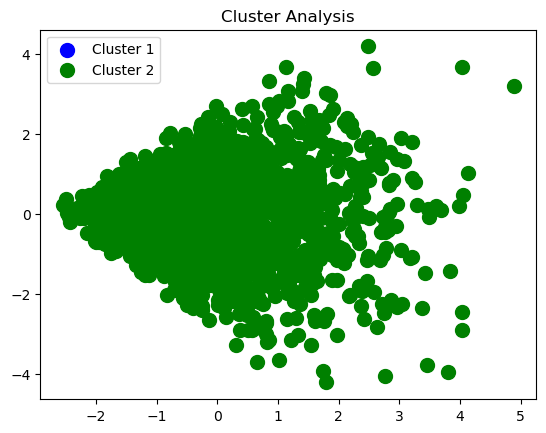

In [74]:
plt.scatter(reduced_df[reduced_df['Cluster'] == 0]['PC1'], reduced_df[reduced_df['Cluster'] == 0]['PC2'], s=100, c='blue', label='Cluster 1')
plt.scatter(reduced_df[reduced_df['Cluster'] == 1]['PC1'], reduced_df[reduced_df['Cluster'] == 1]['PC2'], s=100, c='green', label='Cluster 2')
plt.title("Cluster Analysis")
plt.legend()
plt.show()


#kmeansclustering

C:\Users\boina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\boina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\boina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\boina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

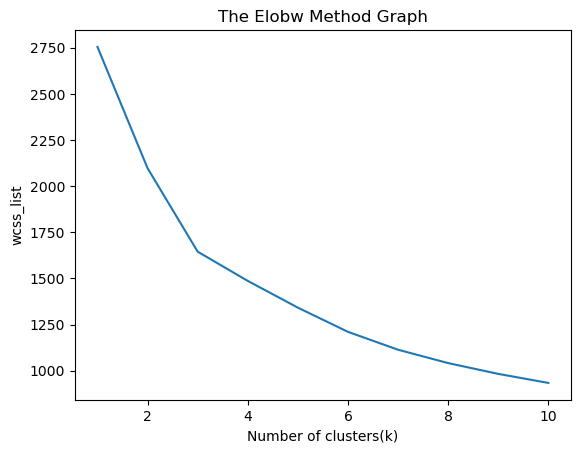

In [221]:
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(df)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show() 

In [237]:
df.head()

,Protein,Fat,vitaminC,Fibre
0,0.452369,1.170926,1.079271,1.702960
1,2.321087,0.706856,0.350088,0.658249
2,0.884554,1.186571,2.428544,1.984562
3,0.715501,0.577599,0.270925,0.369266
4,0.132610,0.544521,0.116884,0.557309


In [238]:
X=scaler.fit_transform(df)

In [239]:
kmeans = KMeans(n_clusters=3, random_state=42) 
kmeans.fit(X)

C:\Users\boina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [241]:
cluster_assignments = kmeans.labels_

In [243]:
cluster_assignments

array([2, 1, 2, ..., 0, 1, 1])

In [245]:
df['cluster']=cluster_assignments

In [246]:
df.head()

,Protein,Fat,vitaminC,Fibre,cluster
0,0.452369,1.170926,1.079271,1.702960,2
1,2.321087,0.706856,0.350088,0.658249,1
2,0.884554,1.186571,2.428544,1.984562,2
3,0.715501,0.577599,0.270925,0.369266,0
4,0.132610,0.544521,0.116884,0.557309,0


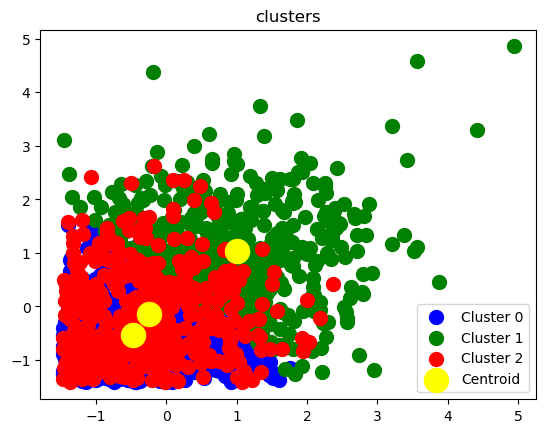

In [210]:
plt.scatter(X[cluster_assignments == 0, 0], X[cluster_assignments == 0, 1], s = 100, c = 'blue', label = 'Cluster 0')  
plt.scatter(X[cluster_assignments == 1, 0], X[cluster_assignments == 1, 1], s = 100, c = 'green', label = 'Cluster 1')   
plt.scatter(X[cluster_assignments == 2, 0], X[cluster_assignments == 2, 1], s = 100, c = 'red', label = 'Cluster 2')   
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')
plt.title('clusters')
plt.legend()

In [251]:
x=df.drop('cluster',axis=1)
y=df['cluster']

In [252]:
X=scaler.fit_transform(x)

In [254]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3, random_state=42)

In [255]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(xtrain,ytrain)

RandomForestClassifier()

In [256]:
ytestpredr=rfc.predict(xtest)
ytrainpredr=rfc.predict(xtrain)

In [259]:
from sklearn.metrics import accuracy_score
acc_rfc=accuracy_score(ytest, ytestpredr)
acc_rfc

0.9522900763358778

In [263]:
print(rfc.predict([[0.452369,1.170926,1.079271,1.702960]]))

[2]


C:\Users\boina\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [265]:
import pickle
pickle.dump(rfc,open("rfmodel.pkl","wb"))